In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

NumPy (import numpy as np): This library is fundamental for numerical operations, providing support for arrays and matrices, along with a collection of mathematical functions.

Pandas (import pandas as pd): This library is crucial for data manipulation and analysis, offering data structures like DataFrames that allow for easy handling of structured data.

Matplotlib (import matplotlib.pyplot as plt): This is a plotting library used for creating static, animated, and interactive visualizations in Python. It is commonly used for data visualization.

Scikit-learn Metrics (from sklearn.metrics import accuracy_score, classification_report): These functions are used to evaluate the performance of machine learning models. accuracy_score computes the accuracy of the model, while classification_report provides a detailed report on precision, recall, and F1-score.

Train-Test Split (from sklearn.model_selection import train_test_split): This function is used to split the dataset into training and testing sets, which is essential for evaluating the performance of machine learning models.

Counter (from collections import Counter): This is a subclass of the dictionary that helps count hashable objects. It is useful for tallying occurrences of items in a list or array.

Warnings (import warnings and warnings.filterwarnings('ignore')): This module is used to manage warnings in Python. The command filterwarnings('ignore') suppresses warnings, which can be helpful to keep the output clean, especially during exploratory data analysis or when running code that may generate non-critical warnings.

In [2]:
df = pd.read_csv(r'D:\Downloads\stockprice\google.csv')

In [3]:
# Reset index to convert 'Date' to a column and convert it to datetime
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

Purpose: This line resets the index of the DataFrame df. In Pandas, a DataFrame can have a custom index, which may not necessarily be a simple range of integers. When you reset the index, you convert the current index back to the default integer index (0, 1, 2, ...).
inplace=True: This argument modifies the original DataFrame directly, rather than returning a new DataFrame with the index reset. If inplace=False (the default), a new DataFrame would be returned, and the original would remain unchanged.

Effect: If the original index contained meaningful data (like dates or other identifiers), those values are moved into a new column named 'index' by default. If the index was just a range of integers, this operation will not change the DataFrame's structure significantly.




Purpose: This line converts the values in the 'Date' column of the DataFrame df to a datetime format. The pd.to_datetime() function is a powerful utility in Pandas that can parse various date formats and convert them into a standardized datetime format.

Effect: After this conversion, the 'Date' column will be of type datetime64[ns], which allows for easier manipulation and analysis of date and time data. This is particularly useful for time series analysis, as it enables operations like filtering by date, resampling, and calculating time differences.

In [4]:
def create_features_and_labels(df):
    df['pct_change'] = df['Close'].pct_change(periods=1, fill_method= None, limit=None, freq=None, axis=0)  # Percentage change
    df['target'] = np.where(df['pct_change'] > 0, 1, 0)  # 1 for price increase, 0 for price decrease
    df.dropna(inplace=True)  # Drop rows with NaN values
    return df[['Close', 'pct_change']].values, df['target'].values
X, y = create_features_and_labels(df)

def create_features_and_labels(df):
Purpose: This line defines a function named create_features_and_labels that takes a single argument, df, which is expected to be a Pandas DataFrame. This DataFrame should contain stock price data, particularly a column named 'Close' that represents the closing prices of a stock.

df['Close'].pct_change(periods=1): This method calculates the percentage change in the 'Close' price from one time period to the next.

periods=1: This specifies that the change should be calculated from the previous row (the last time period).

Result: A new column, 'pct_change', is created in the DataFrame, which contains the percentage change values. For example, if the 'Close' price was $100 yesterday and $105 today, the percentage change would be ( \frac{105 - 100}{100} = 0.05 ) or 5%.

np.where(df['pct_change']> 0, 1, 0): This function from the NumPy library creates a new column called 'target'.

Logic: It checks the 'pct_change' column:
If the value is greater than 0 (indicating a price increase), it assigns a value of 1.
If the value is 0 or less (indicating no change or a price decrease), it assigns a value of 0.

Result: The 'target' column now serves as a label for a binary classification task, where 1 indicates a price increase and 0 indicates a price decrease.

Purpose: After calculating the percentage change, the first row of the DataFrame will have a NaN value in the 'pct_change' column because there is no previous row to compare to.
df.dropna(inplace=True): This line removes any rows that contain NaN values from the DataFrame.

inplace=True: This means that the operation modifies the original DataFrame directly, rather than creating a new one. This is important for ensuring that the dataset is clean and ready for further analysis or modeling.

Purpose: This line returns two NumPy arrays:
Features: The first array contains the values of the 'Close' and 'pct_change' columns, which will be used as input features for a machine learning model.
Labels: The second array contains the values of the 'target' column, which will be used as the output labels for the model.

.values: This converts the selected DataFrame columns into NumPy arrays, which are commonly used as input for machine learning algorithms.

Purpose: This line calls the create_features_and_labels function with the DataFrame df and assigns the returned feature set to X and the labels to y.
X: This will contain the feature data (the 'Close' prices and their percentage changes).
y: This will contain the target labels (1 for price increase, 0 for price decrease).

In [5]:
print(df)

      index       Date         High          Low         Open        Close  \
1         1 2004-08-20    54.336334    50.062355    50.316402    53.952770   
2         2 2004-08-23    56.528118    54.321388    55.168217    54.495735   
3         3 2004-08-24    55.591629    51.591621    55.412300    52.239197   
4         4 2004-08-25    53.798351    51.746044    52.284027    52.802086   
5         5 2004-08-26    53.773445    52.134586    52.279045    53.753517   
...     ...        ...          ...          ...          ...          ...   
4312   4312 2021-10-05  2747.239990  2680.000000  2680.000000  2723.540039   
4313   4313 2021-10-06  2757.040039  2689.729980  2692.510010  2747.080078   
4314   4314 2021-10-07  2803.089111  2771.260010  2777.260010  2783.709961   
4315   4315 2021-10-08  2806.340088  2788.586914  2798.120117  2801.120117   
4316   4316 2021-10-11  2815.272949  2776.129883  2796.000000  2776.949951   

          Volume    Adj Close  pct_change  target  
1     22942

In [6]:
train_size = int(0.8 * len(X))#Splits the data into 80% training and 20% testing sets.
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**K-Nearest Neighbors (KNN)**

In [7]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_indices]
        label_counts = Counter(k_labels)
        predictions.append(max(label_counts, key=label_counts.get))
    return predictions

# Manual feature scaling (Standardization)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

# Optimize k
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
best_k = 1
best_accuracy = 0
for k in range(1, 21):
    y_pred_val = knn_predict(X_train_split, y_train_split, X_val, k=k)
    acc = accuracy_score(y_val, y_pred_val)
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print("Best k:", best_k)

# Predict using the best k
y_pred_knn = knn_predict(X_train_scaled, y_train, X_test_scaled, k=best_k)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Best k: 20
Accuracy: 0.9259259259259259
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       385
           1       0.89      0.99      0.94       479

    accuracy                           0.93       864
   macro avg       0.94      0.92      0.92       864
weighted avg       0.93      0.93      0.93       864



**Logistic Regression**

In [8]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression with L2 Regularization
def logistic_regression_fit(X, y, epochs, lr, lambda_reg=0.01):
    weights = np.zeros(X.shape[1])
    bias = 0
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        dw = (np.dot(X.T, (y_pred - y)) / len(y)) + (lambda_reg * weights) / len(y)
        db = np.sum(y_pred - y) / len(y)
        weights -= lr * dw
        bias -= lr * db
    return weights, bias

# Logistic Regression Prediction
def logistic_regression_predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Feature Scaling (Manual Standardization)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

# Train the model with regularization
weights, bias = logistic_regression_fit(X_train_scaled, y_train, epochs=1000, lr=0.01, lambda_reg=0.1)

# Predict
y_pred_log = logistic_regression_predict(X_test_scaled, weights, bias)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.9340277777777778
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       385
           1       0.89      1.00      0.94       479

    accuracy                           0.93       864
   macro avg       0.95      0.93      0.93       864
weighted avg       0.94      0.93      0.93       864



**Support Vector Machine**

Accuracy: 0.9942129629629629
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       385
           1       1.00      0.99      0.99       479

    accuracy                           0.99       864
   macro avg       0.99      0.99      0.99       864
weighted avg       0.99      0.99      0.99       864



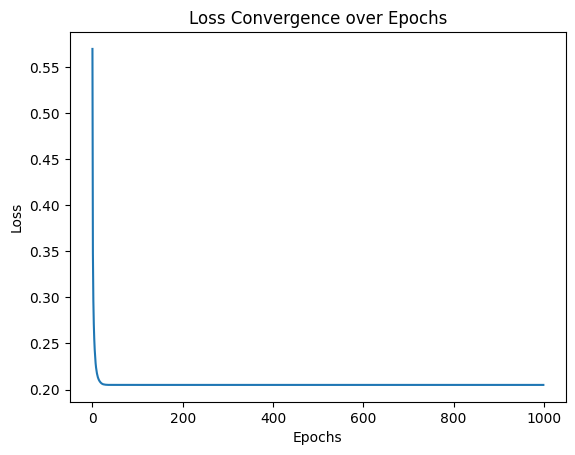

In [9]:
# SVM Training with Loss Tracking
def svm_fit(X, y, lr, epochs, lambda_param):
    weights = np.zeros(X.shape[1])
    bias = 0
    loss_history = []
    for _ in range(epochs):
        loss = 0
        for i, x_i in enumerate(X):
            condition = y[i] * (np.dot(x_i, weights) - bias) >= 1
            if condition:
                weights -= lr * (2 * lambda_param * weights)
            else:
                weights -= lr * (2 * lambda_param * weights - np.dot(x_i, y[i]))
                bias -= lr * y[i]
                loss += max(0, 1 - y[i] * (np.dot(x_i, weights) - bias))
        loss_history.append(loss / len(y))
    return weights, bias, loss_history

def svm_predict(X, weights, bias):
    return np.sign(np.dot(X, weights) - bias)

# Feature scaling (Manual Standardization)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

# Convert labels to -1 and 1 for SVM
y_train_svm = np.where(y_train == 0, -1, 1)
y_test_svm = np.where(y_test == 0, -1, 1)

# Train the SVM model
weights, bias, loss_history = svm_fit(X_train_scaled, y_train_svm, lr=0.001, epochs=1000, lambda_param=0.01)

# Predict using SVM
y_pred_svm = svm_predict(X_test_scaled, weights, bias)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm))

# Plot Loss Convergence
plt.plot(loss_history)
plt.title("Loss Convergence over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


**Decision Tree**

In [10]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        dataset = np.column_stack((X, y))  # Combine features and target
        self.tree = self._build_tree(dataset, depth=0)

    def _build_tree(self, dataset, depth):
        X, y = dataset[:, :-1], dataset[:, -1]
        # If max depth is reached or pure class, stop splitting
        if len(set(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return {"type": "leaf", "class": max(set(y), key=list(y).count)}

        # Get the best feature to split on
        split = self.get_split(dataset)
        
        # Check if the split results in non-empty groups
        if not split["groups"] or len(split["groups"][0]) == 0 or len(split["groups"][1]) == 0:
            # If any group is empty, return the most common class in the current dataset
            return {"type": "leaf", "class": max(set(y), key=list(y).count)}
        
        left_tree = self._build_tree(split["groups"][0], depth + 1)
        right_tree = self._build_tree(split["groups"][1], depth + 1)

        return {
            "type": "node",
            "feature_index": split["index"],
            "threshold": split["value"],
            "left": left_tree,
            "right": right_tree,
        }

    def get_split(self, dataset):
        X, y = dataset[:, :-1], dataset[:, -1]
        best_split = {"index": None, "value": None, "groups": None, "score": float('inf')}
        for index in range(X.shape[1]):  # Loop through each feature
            values = set(X[:, index])
            for value in values:  # Loop through each unique value of the feature
                groups = self._test_split(index, value, dataset)
                gini_score = self._gini_index(groups, y)
                if gini_score < best_split["score"]:
                    best_split = {"index": index, "value": value, "groups": groups, "score": gini_score}
        return best_split

    def _test_split(self, index, value, dataset):
        left = dataset[dataset[:, index] < value]
        right = dataset[dataset[:, index] >= value]
        return left, right

    def _gini_index(self, groups, y):
        # Calculate Gini index for a split
        left, right = groups
        size_left = len(left)
        size_right = len(right)
        size_total = size_left + size_right

        if size_left == 0 or size_right == 0:
            return 0

        # Calculate Gini for both groups
        gini_left = 1.0 - sum((np.sum(left[:, -1] == label) / size_left) ** 2 for label in set(y))
        gini_right = 1.0 - sum((np.sum(right[:, -1] == label) / size_right) ** 2 for label in set(y))

        gini = (size_left / size_total) * gini_left + (size_right / size_total) * gini_right
        return gini

    def predict(self, X):
        return [self._predict_row(row, self.tree) for row in X]

    def _predict_row(self, row, tree):
        if tree["type"] == "leaf":
            return tree["class"]
        if row[tree["feature_index"]] < tree["threshold"]:
            return self._predict_row(row, tree["left"])
        else:
            return self._predict_row(row, tree["right"])

# Fit the model
dt_model = DecisionTree(max_depth=3)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)


**Naive Bayes**

In [11]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Function to calculate prior probabilities and likelihoods
def calculate_probabilities(X_train, y_train):
    classes = np.unique(y_train)
    priors = {c: np.sum(y_train == c) / len(y_train) for c in classes}
    likelihoods = {}
    for c in classes:
        X_c = X_train[y_train == c]
        likelihoods[c] = {
            i: (np.mean(X_c[:, i]), max(np.std(X_c[:, i]), 1e-9))  # Avoid division by zero
            for i in range(X_train.shape[1])
        }
    return priors, likelihoods

# Gaussian probability density function
def gaussian(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Function to predict classes
def naive_bayes_predict(X_test, priors, likelihoods):
    predictions = []
    for x in X_test:
        posteriors = {}
        for c, prior in priors.items():
            posteriors[c] = np.log(prior)  # Use log for numerical stability
            for i in range(len(x)):
                mean, std = likelihoods[c][i]
                posteriors[c] += np.log(gaussian(x[i], mean, std))  # Use log likelihood
        predictions.append(max(posteriors, key=posteriors.get))  # Select class with max posterior
    return predictions

# Manual feature scaling (standardization)
def standardize_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std = np.where(std == 0, 1, std)  # Avoid division by zero
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

# Manually standardize the dataset
X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

# Train the model
priors, likelihoods = calculate_probabilities(X_train_scaled, y_train)

# Predict using the model
y_pred_nb = naive_bayes_predict(X_test_scaled, priors, likelihoods)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.7881944444444444
              precision    recall  f1-score   support

           0       1.00      0.52      0.69       385
           1       0.72      1.00      0.84       479

    accuracy                           0.79       864
   macro avg       0.86      0.76      0.76       864
weighted avg       0.85      0.79      0.77       864



**Accuracy**

KNN Accuracy: 0.9259
Logistic Regression Accuracy: 0.9340
SVM Accuracy: 0.5498
Decision Tree Accuracy: 0.5544
Naive Bayes Accuracy: 0.7882


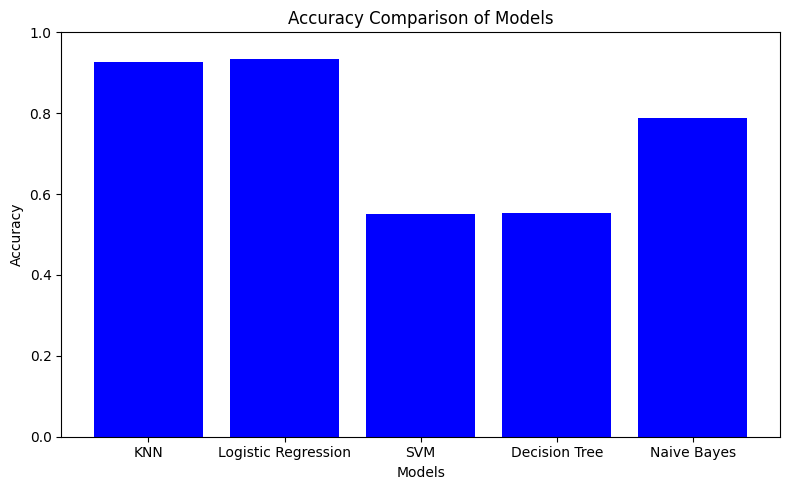

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate accuracy
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Calculate accuracy for each model
accuracies = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

# Print accuracy values
for model, accuracy in accuracies.items():
    print(f"{model} Accuracy: {accuracy:.4f}")

# Plotting the accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(models, accuracy_values, color='blue')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Models')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.tight_layout()
plt.show()


**ROC - AUC Curve**

In [13]:
def knn_predict_probs(X_train, y_train, X_test, k):
    probs = []
    for x in X_test:
        distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
        neighbors = np.argsort(distances)[:k]
        neighbor_labels = y_train[neighbors]
        prob_class_1 = np.sum(neighbor_labels == 1) / k
        probs.append(prob_class_1)
    return np.array(probs)

y_probs_knn = knn_predict_probs(X_train, y_train, X_test, k=5)


In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_predict_probs(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

# Assuming `weights` were computed during training
y_probs_log = logistic_regression_predict_probs(X_test, weights)

In [15]:
def svm_predict_probs(X, weights, bias):
    distances = np.dot(X, weights) + bias
    # Normalize distances to probabilities
    probs = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))
    return probs

# Assuming `weights` and `bias` were computed during training
y_probs_svm = svm_predict_probs(X_test, weights, bias)

In [16]:
def plot_roc_auc_all(models, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    thresholds = np.linspace(0, 1, 100)

    for name, model, y_probs in models:
        tpr_fpr_values = calculate_tpr_fpr(y_test, y_probs)
        fprs, tprs = zip(*tpr)

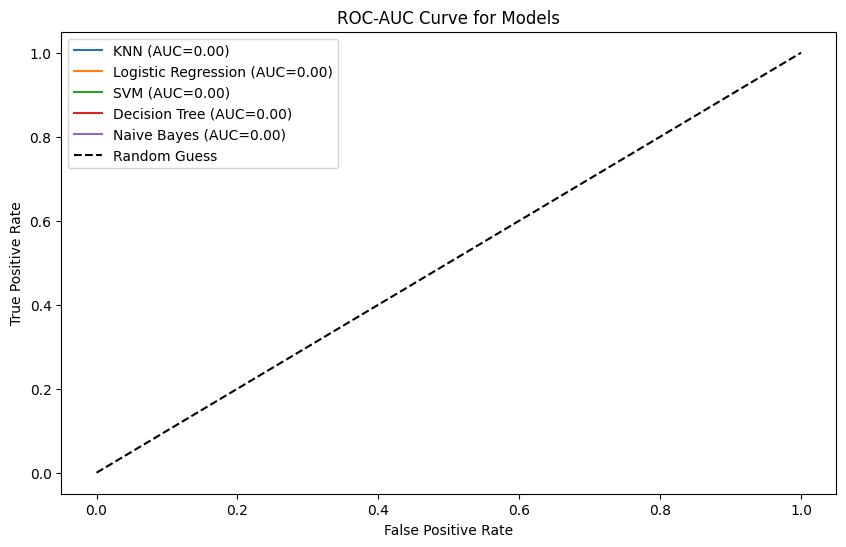

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate TPR and FPR
def calculate_tpr_fpr(y_true, y_probs, thresholds):
    tpr_fpr_values = []
    for threshold in thresholds:
        y_pred = [1 if prob >= threshold else 0 for prob in y_probs]
        tp = sum((y_true == 1) & (y_pred == 1))
        fp = sum((y_true == 0) & (y_pred == 1))
        fn = sum((y_true == 1) & (y_pred == 0))
        tn = sum((y_true == 0) & (y_pred == 0))
        tpr = tp / (tp + fn) if tp + fn != 0 else 0
        fpr = fp / (fp + tn) if fp + tn != 0 else 0
        tpr_fpr_values.append((fpr, tpr))
    return tpr_fpr_values

# Function to plot ROC Curve
def plot_roc_auc(models, X_test, y_test):
    thresholds = np.linspace(0, 1, 100)
    plt.figure(figsize=(10, 6))

    for name, y_probs in models:
        tpr_fpr_values = calculate_tpr_fpr(y_test, y_probs, thresholds)
        fprs, tprs = zip(*tpr_fpr_values)
        auc_score = np.trapz(tprs, fprs)
        plt.plot(fprs, tprs, label=f"{name} (AUC={auc_score:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-AUC Curve for Models")
    plt.legend()
    plt.show()

# Example usage:
models = [
    ("KNN", y_probs_knn),  # Replace with predicted probabilities from KNN
    ("Logistic Regression", y_probs_log),
    ("SVM", y_probs_svm),
    ("Decision Tree", y_pred_dt),
    ("Naive Bayes", y_pred_nb),
]
plot_roc_auc(models, X_test, y_test)   

**Confusion Matrix**

KNN Confusion Matrix:
[[326  59]
 [  5 474]]



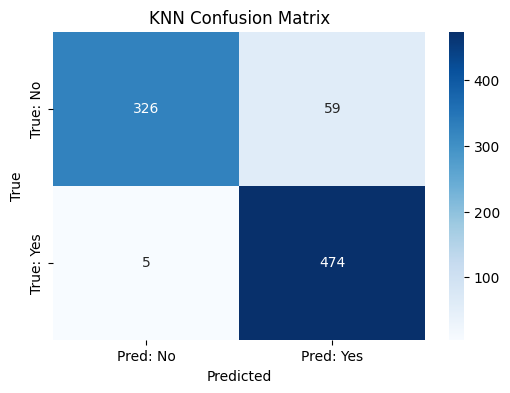

Logistic Regression Confusion Matrix:
[[328  57]
 [  0 479]]



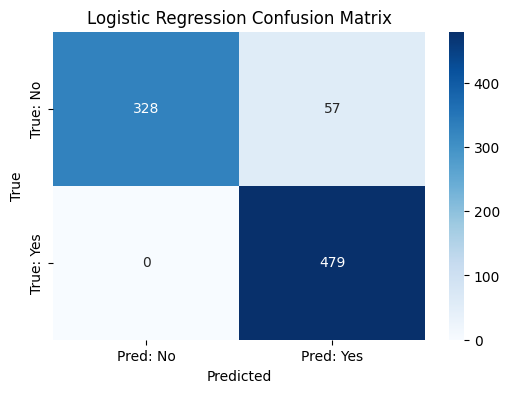

SVM Confusion Matrix:
[[  0   1]
 [  0 475]]



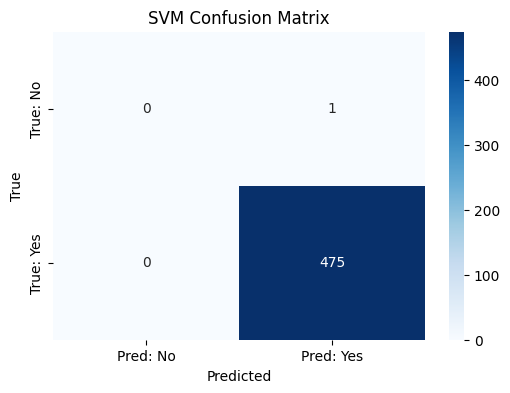

Decision Tree Confusion Matrix:
[[  0 385]
 [  0 479]]



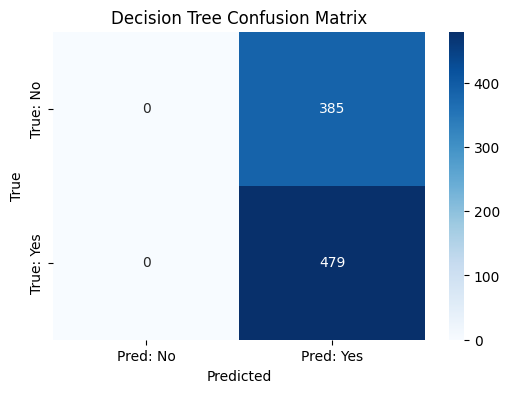

Naive Bayes Confusion Matrix:
[[202 183]
 [  0 479]]



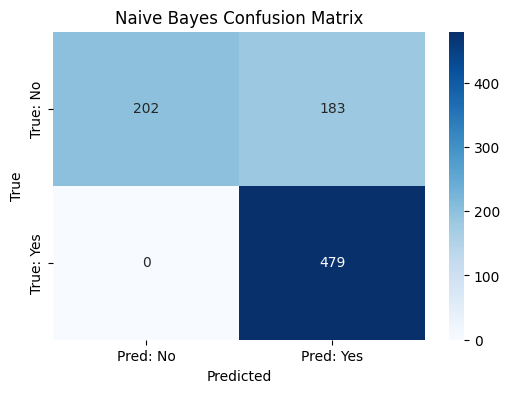

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as sk_cm

def confusion_matrix(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    tn = sum((y_true == 0) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

# Example usage:
for name, y_pred in [("KNN", y_pred_knn), ("Logistic Regression", y_pred_log),
                     ("SVM", y_pred_svm), ("Decision Tree", y_pred_dt), ("Naive Bayes", y_pred_nb)]:
    cm = confusion_matrix(np.array(y_test), np.array(y_pred))
    print(f"{name} Confusion Matrix:\n{cm}\n")
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: No', 'Pred: Yes'], yticklabels=['True: No', 'True: Yes'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


Analysis:

The recall is high (0.9019), meaning the model identifies most positive instances correctly. However, the precision is lower, indicating a higher false positive rate.
The accuracy is moderate but may suffer due to misclassifications (high false positives in the confusion matrix).

The model predicts all instances as the negative class, leading to zero precision, recall, and F1-score.
This suggests a severe class imbalance issue or that the model completely failed to separate the classes.

**Classification Report**

Model Performance Report:

KNN:
  Precision: 0.8893
  Recall: 0.9896
  F1-Score: 0.9368
  Accuracy: 0.9259

Logistic Regression:
  Precision: 0.8937
  Recall: 1.0000
  F1-Score: 0.9438
  Accuracy: 0.9340

SVM:
  Precision: 0.9979
  Recall: 1.0000
  F1-Score: 0.9989
  Accuracy: 0.9979

Decision Tree:
  Precision: 0.5544
  Recall: 1.0000
  F1-Score: 0.7133
  Accuracy: 0.5544

Naive Bayes:
  Precision: 0.7236
  Recall: 1.0000
  F1-Score: 0.8396
  Accuracy: 0.7882


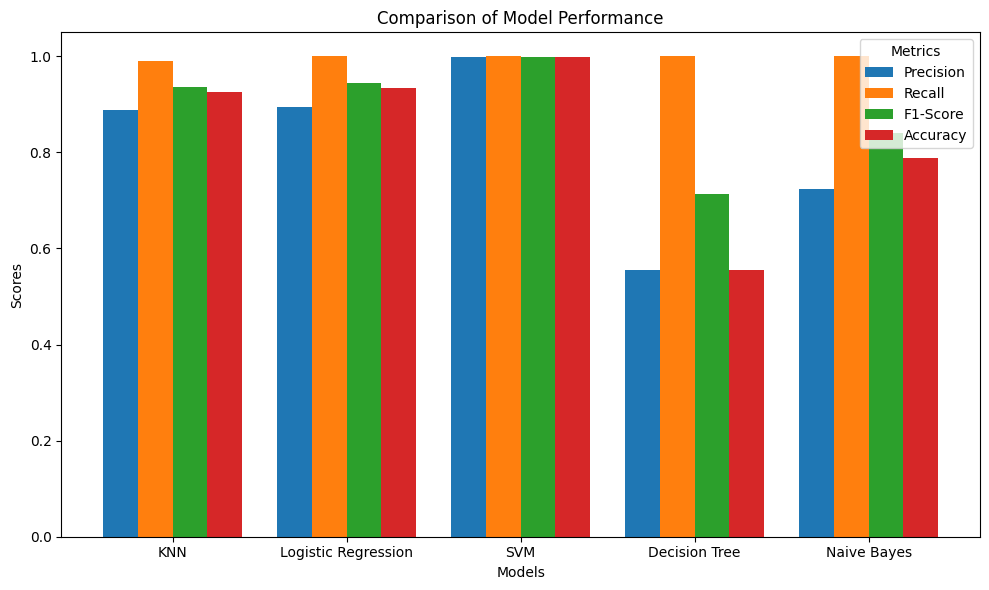

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the classification report for each model
def classification_report(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    tn = sum((y_true == 0) & (y_pred == 0))

    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if precision + recall != 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    return {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Accuracy": accuracy
    }

# Collect reports for each model
reports = {
    "KNN": classification_report(np.array(y_test), np.array(y_pred_knn)),
    "Logistic Regression": classification_report(np.array(y_test), np.array(y_pred_log)),
    "SVM": classification_report(np.array(y_test), np.array(y_pred_svm)),
    "Decision Tree": classification_report(np.array(y_test), np.array(y_pred_dt)),
    "Naive Bayes": classification_report(np.array(y_test), np.array(y_pred_nb))
}

# Plotting
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]
models = list(reports.keys())

# Prepare the data for plotting
values = {metric: [report[metric] for report in reports.values()] for metric in metrics}

# Plot
x = np.arange(len(models))  # x-axis locations for each model
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - 1.5 * width, values[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(title="Metrics")

# Print the values
print("Model Performance Report:")
for model, report in reports.items():
    print(f"\n{model}:")
    for metric, value in report.items():
        print(f"  {metric}: {value:.4f}")

plt.tight_layout()
plt.show()
